# Proyecto tienda online Ice

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. 

## Objetivo

Identificar patrones que determinen si un juego tiene éxito o no, para lograr detectar proyectos prometedores y planificar campañas publicitarias para el 2017.

Para lograr el objetivo, se trabajará con la base de datos proporcionada con la empresa, y se examinará la información obtenida del año 2016, para realizar las estrategias adecuadas para el próximo año 2017.

## Inicialización

In [1]:
#Se cargan las librerías

import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

## Carga de datos

In [2]:
#Se cargan los dataframes que se van a trabajar

df_games = pd.read_csv('/datasets/games.csv')

## Revisión de datos

In [3]:
#Se imprime la información general del df

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Se imprime una muestra para visualizar como se encuentra capturada la información

df_games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13769,Metal Gear Solid: Digital Graphic Novel,PSP,2006.0,Misc,0.02,0.00,0.02,0.00,78.0,7.2,M
745,High School Musical: Makin' the Cut!,DS,2007.0,Puzzle,1.06,0.90,0.00,0.23,NaN,NaN,NaN
16164,SeaWorld Adventure Parks: Shamu's Deep Sea Adv...,XB,2005.0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN
4477,Spec Ops: Covert Assault,PS,2001.0,Shooter,0.24,0.16,0.00,0.03,NaN,tbd,T
6826,Dynasty Warriors 7,X360,2011.0,Action,0.16,0.06,0.00,0.02,58.0,8,T
2125,FIFA Soccer 2005,XB,2004.0,Sports,0.33,0.60,0.00,0.04,81.0,8.7,E
8945,The Wizard of Oz: Beyond The Yellow Brick Road,DS,2008.0,Role-Playing,0.13,0.00,0.00,0.01,68.0,6,E
5128,Slime MoriMori Dragon Quest: Shougeki No Shipp...,GBA,2003.0,Adventure,0.00,0.00,0.36,0.01,NaN,NaN,NaN
12909,Front Mission Evolved,PC,2010.0,Shooter,0.05,0.00,0.00,0.00,63.0,5.1,T
4108,The Saboteur,PS3,2009.0,Action,0.20,0.21,0.00,0.07,72.0,8.1,M


Podemos observar que hay varios detalles que se deben de tratar en el dataframe, como lo son tipos de datos incorrectos que se tienen que ajustar al correspondiente, también visualizamos que hay valores ausentes en varias columnas, también es necesario definir si tratarlos o no, y en caso de tratarlos, analizar la mejor manera de tratarlos. También es necesario analizar si se encuentran valores duplicados, para que sean tratados y que esto no vaya a entorpecer al momento de realizar el análisis de la información, poner los nombres de las columnas en minúsculas, unificar nos nombres de la columna name y pasarlos a mayúsculas para una mejor práctica

## Corrección de datos

In [5]:
#Se pasan los nombres de las columnas a minúsculas

df_games.columns = [a.lower() for a in df_games.columns]
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
#Se pasan los strings de la columna name a mayúculas, se eliminan espacios y signos no deseados

df_games['name']=df_games['name'].str.upper()
df_games['name']=df_games['name'].str.strip()
df_games['name']=df_games['name'].str.replace(":","").str.replace(";","").str.replace(",","").str.replace(".","")
df_games['name'].value_counts(dropna=False).sort_values(ascending=False)

NEED FOR SPEED MOST WANTED                      12
LEGO MARVEL SUPER HEROES                         9
RATATOUILLE                                      9
FIFA 14                                          9
MADDEN NFL 07                                    9
                                                ..
THE NIGHTMARE OF DRUAGA FUSHIGINO DUNGEON        1
CIEL NOSURGE USHINAWARETA HOSHI E SASAGU UTA     1
SHAMAN KING SOUL FIGHT                           1
NANO ASSAULT                                     1
CRIME KILLER                                     1
Name: name, Length: 11547, dtype: int64

In [7]:
#Revisar valores perdidos

df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
#Tratar los valores perdidos en columna name

df_games['name'] = df_games['name'].fillna('UNKNOWN')
df_games[df_games['name'] == 'UNKNOWN']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,UNKNOWN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,UNKNOWN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
#Se realiza una función para agrupar los nombres de las plataformas en "secciones", para una mejor práctica por si se 
#llega a requerir en algún análisis

def group_platform (x):
    if x in ['3DS','DS','GB','GBA','GC','N64','NES','SNES','Wii','WiiU']:
        return 'Nintendo'
    elif x in ['PC','PCFX']:
        return 'PC'
    elif x in ['PS','PS2','PS3','PS4','PSP','PSV']:
        return 'PlayStation'
    elif x in ['X360','XB','XOne']:
        return 'XBox'
    else:
        return 'Other'

df_games['group_platform'] = df_games['platform'].apply(group_platform)
df_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,group_platform
15533,BATTLE PRINCESS OF ARCADIAS,PS3,2013.0,Role-Playing,0.00,0.00,0.02,0.00,69.0,7.9,T,PlayStation
16076,KING'S QUEST THE COMPLETE COLLECTION,PS4,2016.0,Adventure,0.01,0.00,0.00,0.00,NaN,tbd,E10+,PlayStation
16545,MADAGASCAR ESCAPE 2 AFRICA,PC,2008.0,Action,0.01,0.00,0.00,0.00,58.0,8,E10+,PC
15123,MAJOR DREAM MAJOR DS DREAM BASEBALL,DS,2008.0,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN,Nintendo
8992,DERBY STALLION GOLD,3DS,2014.0,Sports,0.00,0.00,0.14,0.00,NaN,NaN,NaN,Nintendo
6055,LOONEY TUNES RACING,PS,2000.0,Racing,0.16,0.11,0.00,0.02,71.0,tbd,E,PlayStation
3420,NARUTO THE BROKEN BOND,X360,2008.0,Action,0.24,0.28,0.00,0.06,80.0,7.8,T,XBox
14369,MAJESTY 2 THE FANTASY KINGDOM SIM,X360,NaN,Simulation,0.03,0.00,0.00,0.00,NaN,NaN,NaN,XBox
8579,DESTRUCTION DERBY 64,N64,1999.0,Racing,0.13,0.03,0.00,0.00,NaN,NaN,NaN,Nintendo
1661,THE MAGICAL QUEST STARRING MICKEY MOUSE,SNES,1992.0,Platform,0.66,0.17,0.35,0.03,NaN,NaN,NaN,Nintendo


In [10]:
#Revisar valores perdidos en columna year of release

df_games[df_games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,group_platform
183,MADDEN NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,PlayStation
377,FIFA SOCCER 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,PlayStation
456,LEGO BATMAN THE VIDEOGAME,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,Nintendo
475,WWE SMACKDOWN VS RAW 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,PlayStation
609,SPACE INVADERS,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC WORLD CHAMPIONSHIP DARTS 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,PlayStation
16405,FREAKY FLYERS,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,Nintendo
16448,INVERSION,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,PC
16458,HAKUOUKI SHINSENGUMI KITAN,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,PlayStation


In [11]:
#Eliminar valores perdidos en columna year of release

df_games = df_games.dropna(subset=["year_of_release"])
df_games['year_of_release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [12]:
#Revisar valores perdidos en columna genre

df_games[df_games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,group_platform
659,UNKNOWN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,Other
14244,UNKNOWN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,Other


In [13]:
#Tratar valores perdidos en columna genre

df_games['genre']=df_games['genre'].fillna('Unknown')
df_games[df_games['genre'] == 'Unknown']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,group_platform
659,UNKNOWN,GEN,1993.0,Unknown,1.78,0.53,0.00,0.08,NaN,NaN,NaN,Other
14244,UNKNOWN,GEN,1993.0,Unknown,0.00,0.00,0.03,0.00,NaN,NaN,NaN,Other


In [14]:
#Reemplazar tbd en columna user score

df_games.loc[df_games['user_score'] == "tbd",'user_score'] = np.nan

#Se cambia el tipo de datos de la columna a tipo float
df_games['user_score'] = df_games['user_score'].astype(float)

#Se unifica el tipo de evaluación para que sea comparable con critic score
df_games['user_score'] = df_games['user_score'] * 10

df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,group_platform
0,WII SPORTS,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,Nintendo
1,SUPER MARIO BROS,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,Nintendo
2,MARIO KART WII,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,Nintendo
3,WII SPORTS RESORT,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,Nintendo
4,POKEMON RED/POKEMON BLUE,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,SAMURAI WARRIORS SANADA MARU,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,PlayStation
16711,LMA MANAGER 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,XBox
16712,HAITAKA NO PSYCHEDELICA,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,PlayStation
16713,SPIRITS & SPELLS,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,Nintendo


In [15]:
#Crear columna para visualizar de manera sencilla el rating

def rating_def (x):
    if x == 'E' or x == 'K-A':
        return 'Everyone'
    elif x == 'T':
        return 'Teens'
    elif x == 'M':
        return 'Mature'
    elif x == 'E10+':
        return 'Everyone 10y+'
    elif x == 'EC':
        return 'Early Childhood'
    elif x== 'RP':
        return 'Pending'
    elif x == 'AO':
        return 'Adults Only'
    else:
        return 'Pending'
    
df_games['rating_definition'] = df_games['rating'].apply(rating_def)
df_games.sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,group_platform,rating_definition
5278,GUITAR HERO SMASH HITS,PS3,2009.0,Misc,0.20,0.11,0.00,0.05,73.0,72.0,T,PlayStation,Teens
3472,FINAL FANTASY THE 4 HEROES OF LIGHT,DS,2009.0,Role-Playing,0.22,0.10,0.23,0.03,71.0,71.0,E10+,Nintendo,Everyone 10y+
665,HALF-LIFE 2,PC,2004.0,Shooter,2.28,0.02,0.08,0.00,96.0,91.0,M,PC,Mature
11095,MYSTIC HEROES,GC,2002.0,Action,0.03,0.01,0.04,0.00,67.0,85.0,T,Nintendo,Teens
5715,NBA INSIDE DRIVE 2003,XB,2002.0,Sports,0.23,0.07,0.00,0.01,72.0,78.0,E,XBox,Everyone
12014,WALLACE & GROMIT IN PROJECT ZOO,GC,2003.0,Platform,0.05,0.01,0.00,0.00,NaN,NaN,NaN,Nintendo,Pending
14373,BIG ICHIGEKI! PACHI-SLOT TAIKOURYKU UNIVERSAL ...,SAT,1996.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN,Other,Pending
2363,DISSIDIA 012 DUODECIM FINAL FANTASY,PSP,2011.0,Fighting,0.21,0.12,0.46,0.08,78.0,83.0,T,PlayStation,Teens
5500,ETRIAN ODYSSEY,DS,2007.0,Role-Playing,0.19,0.02,0.09,0.02,75.0,85.0,T,Nintendo,Teens
8237,PROFESSIONAL FISHERMAN'S TOUR NORTHERN HEMISPHERE,DS,2007.0,Sports,0.16,0.00,0.00,0.01,NaN,NaN,E,Nintendo,Everyone


In [16]:
#Calcular las ventas totales de columna total sales

df_games['total_sales'] = df_games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,group_platform,rating_definition,total_sales
0,WII SPORTS,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,Nintendo,Everyone,82.54
1,SUPER MARIO BROS,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,Nintendo,Pending,40.24
2,MARIO KART WII,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,Nintendo,Everyone,35.52
3,WII SPORTS RESORT,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,Nintendo,Everyone,32.77
4,POKEMON RED/POKEMON BLUE,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,Nintendo,Pending,31.38
5,TETRIS,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,Nintendo,Pending,30.26
6,NEW SUPER MARIO BROS,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,Nintendo,Everyone,29.80
7,WII PLAY,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,Nintendo,Everyone,28.91
8,NEW SUPER MARIO BROS WII,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,84.0,E,Nintendo,Everyone,28.32
9,DUCK HUNT,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,Nintendo,Pending,28.31


In [17]:
#Revisar valores duplicados

df_games[df_games[['name','platform','year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,group_platform,rating_definition,total_sales
14244,UNKNOWN,GEN,1993.0,Unknown,0.0,0.00,0.03,0.0,NaN,NaN,NaN,Other,Pending,0.03
16230,MADDEN NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,55.0,E,PlayStation,Everyone,0.01


In [18]:
#Eliminar valores duplicados detectados

df_games = df_games.drop([13290,14291]).reset_index(drop=True)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16444 non-null  object 
 1   platform           16444 non-null  object 
 2   year_of_release    16444 non-null  float64
 3   genre              16444 non-null  object 
 4   na_sales           16444 non-null  float64
 5   eu_sales           16444 non-null  float64
 6   jp_sales           16444 non-null  float64
 7   other_sales        16444 non-null  float64
 8   critic_score       7982 non-null   float64
 9   user_score         7462 non-null   float64
 10  rating             9767 non-null   object 
 11  group_platform     16444 non-null  object 
 12  rating_definition  16444 non-null  object 
 13  total_sales        16444 non-null  float64
dtypes: float64(8), object(6)
memory usage: 1.8+ MB


## Análisis de información

In [19]:
#Revisar cuantos juegos fueron lanzados por año

games_per_year = df_games.groupby('year_of_release')['name'].count()
games_per_year

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     378
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1005
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

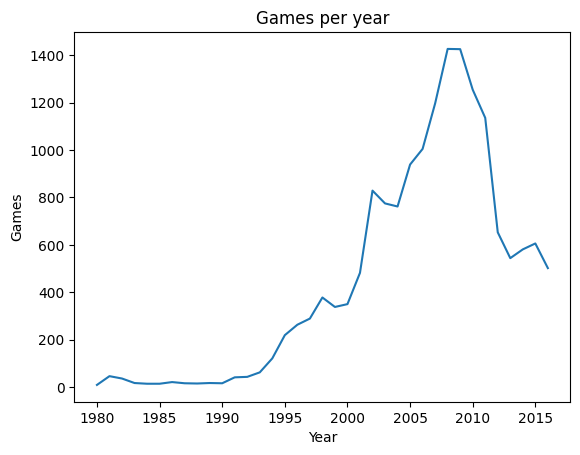

In [20]:
games_per_year.plot(kind='line', xlabel='Year', ylabel='Games', title='Games per year')
plt.show

Podemos visualizar que aproximadamente a partir del año 1995 es cuando comienza a reflejarse ventas significativas, por lo que a partir de este año se tomarán los datos para realizar los análisis correspondientes

In [21]:
#Seleccionar los años con mayores ventas que son las que se trabajarán y analizarán y se quitan los años con 
#ventas no significativas

df_games.query('year_of_release >= 1995', inplace=True)
df_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,group_platform,rating_definition,total_sales
9202,VAMPIRE MOON THE MYSTERY OF THE HIDDEN SUN,DS,2010.0,Adventure,0.12,0.01,0.0,0.01,50.0,NaN,E,Nintendo,Everyone,0.14
1177,FIGHT NIGHT ROUND 3,PS2,2006.0,Fighting,1.07,0.40,0.0,0.10,84.0,81.0,T,PlayStation,Teens,1.57
14218,GARFIELD A TALE OF TWO KITTIES,DS,2006.0,Platform,0.03,0.00,0.0,0.00,59.0,NaN,E,Nintendo,Everyone,0.03
13413,KIDS LEARN MUSIC A+ EDITION,DS,2011.0,Misc,0.04,0.00,0.0,0.00,NaN,NaN,NaN,Nintendo,Pending,0.04
3588,BATMAN VENGEANCE,PS2,2001.0,Adventure,0.27,0.21,0.0,0.07,68.0,67.0,T,PlayStation,Teens,0.55
13932,MX WORLD TOUR FEATURING JAMIE LITTLE,XB,2005.0,Racing,0.03,0.01,0.0,0.00,51.0,NaN,E,XBox,Everyone,0.04
205,WARZONE 2100,PS,1999.0,Strategy,2.79,1.89,0.0,0.33,NaN,NaN,NaN,PlayStation,Pending,5.01
11580,IMAGINE MY RESTAURANT,DS,2009.0,Simulation,0.00,0.07,0.0,0.01,NaN,NaN,NaN,Nintendo,Pending,0.08
7304,GI JOE THE RISE OF COBRA,PS3,2009.0,Action,0.11,0.07,0.0,0.03,43.0,48.0,T,PlayStation,Teens,0.21
4147,GODZILLA SAVE THE EARTH,PS2,2004.0,Fighting,0.23,0.18,0.0,0.06,62.0,87.0,T,PlayStation,Teens,0.47


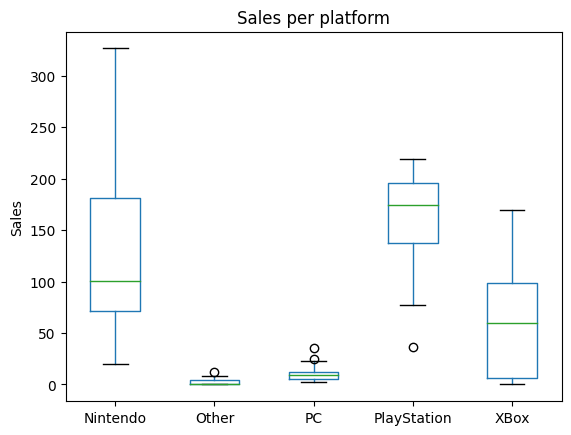

In [22]:
#Observar el comportamiento de las ventas en las diferentes plataformas

sales_per_platform = df_games.pivot_table(index='year_of_release', columns='group_platform',values='total_sales', aggfunc='sum', fill_value=0)
sales_per_platform.plot(kind='box', xlabel='Group platform', ylabel='Sales', title='Sales per platform')
plt.show()

Podemos observar claramente que hay plataformas que han tenido un comportamiento bastante aceptable (Nintendo, playstation, xbox) sobre todo, así como unas ventas significativas, por lo que podemos considerar que son las que se encuentran entre las 'favoritas' de los usuarios.

In [23]:
#Se seleccionan las plataformas potencialmente rentables

list_platform = ['Nintendo', 'PlayStation','XBox', 'PC']
df_games.query('group_platform == @list_platform', inplace=True)

In [24]:
#Visualizar diferencias en ventas entre Playstation y Nintendo mediante la prueba de Levene en donde comprobamos si la varianza
#es la misma o no

nintendo_sales = sales_per_platform['Nintendo']
playstation_sales = sales_per_platform['PlayStation']

alpha = 0.1
p_levene=st.levene(nintendo_sales, playstation_sales).pvalue
print(f'Valor p: {round(p_levene,2)}')
if p_levene > alpha:
    print("No se rechaza la hipótesis nula sobre la igualdad de las varianzas")
else:
    print('Se rechaza la hipótesis nula sobre la igualdad de las varianzas')

Valor p: 0.06
Se rechaza la hipótesis nula sobre la igualdad de las varianzas


In [25]:
#Realizar la hipótesis nula sobre la igualdad en ventas promedio entre playstation y nintendo

vta_prom_test = st.ttest_ind(nintendo_sales,playstation_sales,equal_var=False).pvalue
print(f'Valor p: {round(vta_prom_test,2)}')
if vta_prom_test>alpha:
    print('No se rechaza la hipótesis nula sobre la igualdad de la media de ventas')
else:
    print('Se rechaza la hipótesis nula sobre la igualdad de la media de ventas')

Valor p: 0.24
No se rechaza la hipótesis nula sobre la igualdad de la media de ventas


In [26]:
#Obtener el rendimiento promedio de los juegos de la plataforma nintendo por los últimos 3 años

df_games.query('year_of_release > 2013')
rend_nintendo=df_games[df_games['group_platform'] == 'Nintendo']
rend_nintendo.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,group_platform,rating_definition,total_sales
14673,JUSTICE LEAGUE HEROES THE FLASH,GBA,2006.0,Action,0.02,0.01,0.00,0.00,72.0,74.0,E10+,Nintendo,Everyone 10y+,0.03
2709,JUMP ULTIMATE STARS,DS,2006.0,Fighting,0.00,0.00,0.74,0.00,NaN,NaN,NaN,Nintendo,Pending,0.74
12667,ALVIN AND THE CHIPMUNKS,Wii,2007.0,Misc,0.05,0.00,0.00,0.00,30.0,36.0,E,Nintendo,Everyone,0.05
10760,ALIEN HOMINID,GC,2004.0,Shooter,0.07,0.02,0.00,0.00,78.0,85.0,T,Nintendo,Teens,0.09
13998,LANGRISSER REINCARNATION TENSEI,3DS,2015.0,Role-Playing,0.02,0.00,0.01,0.00,NaN,NaN,NaN,Nintendo,Pending,0.03
8084,SPORTS ILLUSTRATED FOR KIDS BASEBALL,GBA,2001.0,Sports,0.12,0.05,0.00,0.00,39.0,NaN,E,Nintendo,Everyone,0.17
9402,TOM CLANCY'S SPLINTER CELL DOUBLE AGENT,Wii,2006.0,Action,0.10,0.01,0.00,0.01,61.0,74.0,M,Nintendo,Mature,0.12
2990,FINAL FANTASY CRYSTAL CHRONICLES RING OF FATES,DS,2007.0,Role-Playing,0.22,0.01,0.42,0.02,77.0,72.0,E10+,Nintendo,Everyone 10y+,0.67
12367,SCARS,N64,1998.0,Racing,0.05,0.01,0.00,0.00,NaN,NaN,NaN,Nintendo,Pending,0.06
7456,SUPER DODGE BALL ADVANCE,GBA,2001.0,Sports,0.14,0.05,0.00,0.00,79.0,NaN,E,Nintendo,Everyone,0.19


In [27]:
sales_score=rend_nintendo[['total_sales','critic_score','user_score']].fillna(-1).query('critic_score >= 0 & user_score >= 0')
sales_score['average_score']=(sales_score['critic_score'] + sales_score['user_score']) / 2
sales_score.describe()

,total_sales,critic_score,user_score,average_score
count,1775.000000,1775.000000,1775.000000,1775.000000
mean,0.857837,67.654085,71.966761,69.810423
std,3.006003,14.339372,14.834545,13.356517
min,0.010000,19.000000,7.000000,18.500000
25%,0.110000,60.000000,65.000000,62.500000
50%,0.280000,70.000000,75.000000,72.500000
75%,0.695000,78.000000,83.000000,79.500000
max,82.540000,97.000000,96.000000,95.000000


In [28]:
#Obtener correlación para visualizar si hay relación entre las ventas y el score de críticos

sales_score.corr().round(3)

,total_sales,critic_score,user_score,average_score
total_sales,1.000,0.152,0.093,0.133
critic_score,0.152,1.000,0.677,0.913
user_score,0.093,0.677,1.000,0.919
average_score,0.133,0.913,0.919,1.000


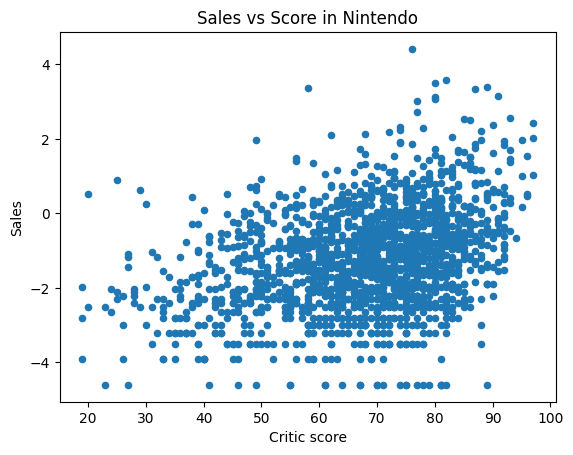

In [29]:
#Graficar correlación para mejor visión y comprensión

sales_score['log_sales']=np.log(sales_score['total_sales'])
sales_score.plot(kind='scatter', xlabel='Critic score', ylabel='Sales', x='critic_score', y='log_sales', title='Sales vs Score in Nintendo')
plt.show()

Se puede visualizar que hay cierta relación entre los scores y las ventas, sobre todo influyen un poco más los score de las críticas por encima del score de los usuarios, por lo que se puede decir, que en cierta parte las ventas se basan también en lo que la crítica señala, ya que un gran porcentaje de población se basa en las críticas de los productos para saber si realizar o no una compra, lo mismo sucede en este caso de los videojuegos.

In [30]:
#Analizar la preferencia de juegos por género en distintas regiones

pref_genre = df_games.groupby(['genre','rating'])[['eu_sales', 'jp_sales', 'na_sales']].sum()
genre_partic = pref_genre / pref_genre.sum(axis=0) * 100
genre_partic

eu_sales   jp_sales   na_sales
genre        rating                                 
Action       AO       0.034104   0.000000   0.040468
             E        3.277350   2.316345   3.569846
             E10+     3.561924   0.885270   3.644679
             EC       0.000000   0.000000   0.013489
             M       11.007246   8.056178   8.997681
             T        5.787078   6.536354   5.184707
Adventure    E        0.847012   0.508087   1.088458
             E10+     0.214129   0.082093   0.201055
             EC       0.006150   0.000000   0.006745
             M        0.833594   0.736616   0.598347
             T        0.256060   0.610148   0.268501
Fighting     E        0.016773   0.017750   0.021197
             E10+     0.038577   0.137561   0.092819
             M        0.375704   0.188591   0.572332
             T        3.085025   5.702114   3.851836
Misc         E        4.585048   6.432074   4.881840
             E10+     1.892499   0.394932   2.186229
             EC       0.000000   0.000000   0.028906
             K-A      0.008945   0.323933   0.008351
             M        0.050877   0.064343   0.061665
             T        1.568790   0.317277   2.415547
Platform     E        5.219049   8.868230   5.494640
             E10+     1.023124   0.532493   1.002383
             M        0.031868   0.053249   0.019270
             T        0.381295   0.130905   0.448680
Puzzle       E        1.341802   2.671341   1.435325
             E10+     0.462922   0.765459   0.272998
             T        0.038577   0.088749   0.039504
Racing       E        6.744789   5.513523   5.758002
             E10+     1.096364   0.126467   0.875519
             M        0.086658   0.006656   0.094746
             T        1.892499   0.543587   1.515298
Role-Playing E        0.677051   4.590535   1.113188
             E10+     0.310851   4.870094   0.648450
             M        2.879283   2.203191   2.430964
             T        2.927364  16.054669   2.996872
Shooter      E        0.043609   0.011094   0.101491
             E10+     0.299669   0.403807   0.373846
             M       11.391896   2.695747  10.889715
             T        3.360654   1.113798   3.547363
Simulation   E        2.519232   4.519536   2.612427
             E10+     0.284015   0.268465   0.419774
             M        0.017891   0.046593   0.021519
             T        1.926603   1.297952   1.396142
Sports       E       13.837888   7.949679  14.394363
             E10+     0.694941   0.272903   1.082998
             M        0.035222   0.044374   0.088965
             T        1.455855   0.057687   1.883363
Strategy     E        0.238729   0.468150   0.420738
             E10+     0.370673   0.179716   0.295801
             K-A      0.006150   0.000000   0.073870
             M        0.125794   0.000000   0.083826
             RP       0.001677   0.000000   0.000000
             T        0.829122   0.341683   0.433263

<AxesSubplot:title={'center':'Sales distribution in NA'}, xlabel='Genre', ylabel='Sales'>

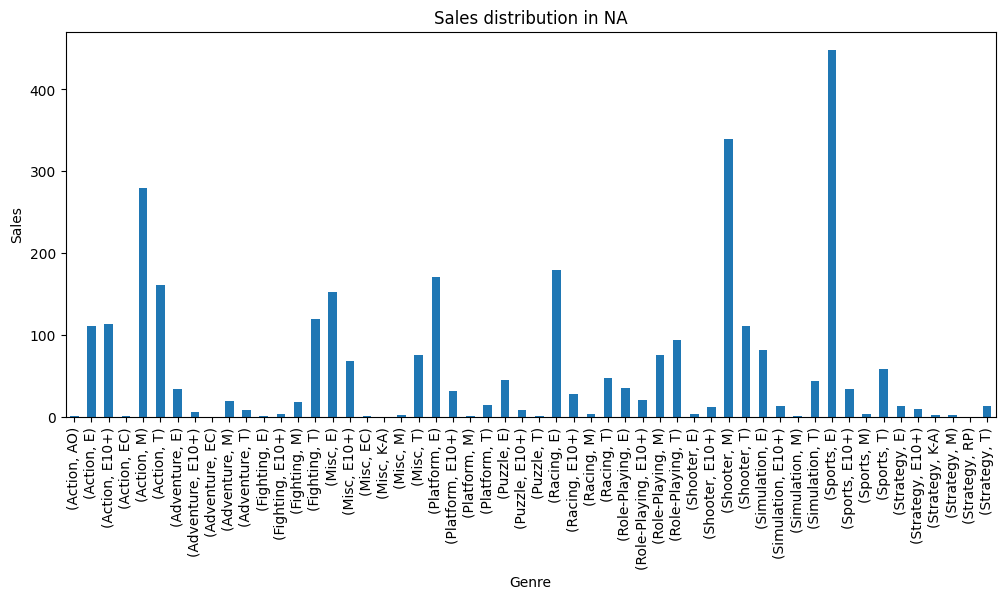

In [31]:
#Preferencia de generos de juegos en NA en cuanto a ventas

pref_genre.na_sales.plot(kind='bar', title='Sales distribution in NA', xlabel='Genre', ylabel='Sales', figsize=(12,5))

<AxesSubplot:title={'center':'Sales distribution in JP'}, xlabel='Genre', ylabel='Sales'>

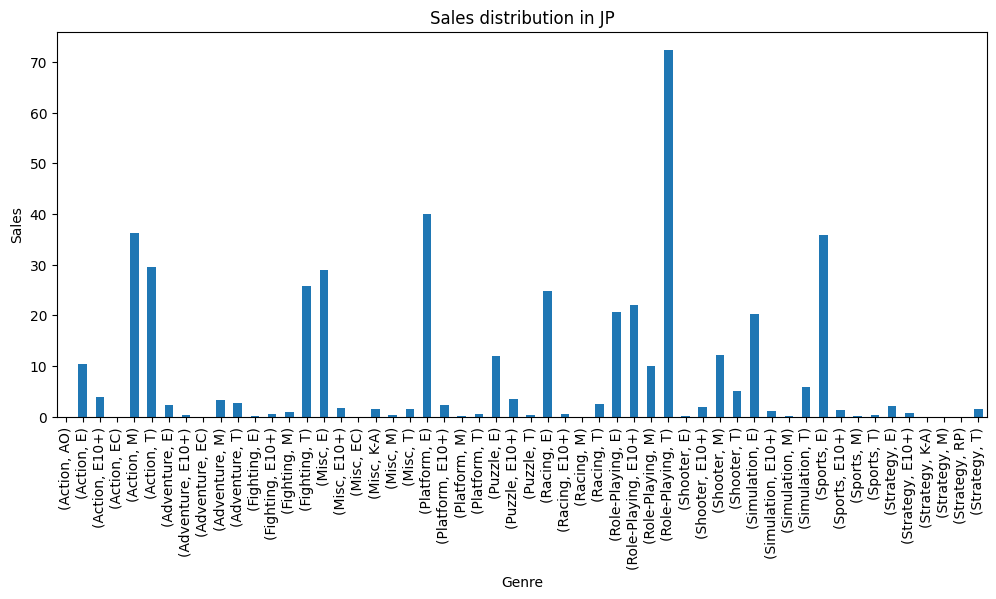

In [32]:
#Preferencia de generos de juegos en JP en cuanto a ventas

pref_genre.jp_sales.plot(kind='bar', xlabel='Genre', ylabel='Sales', title='Sales distribution in JP', figsize=(12,5))

<AxesSubplot:title={'center':'Sales distribution in EU'}, xlabel='Genre', ylabel='Sales'>

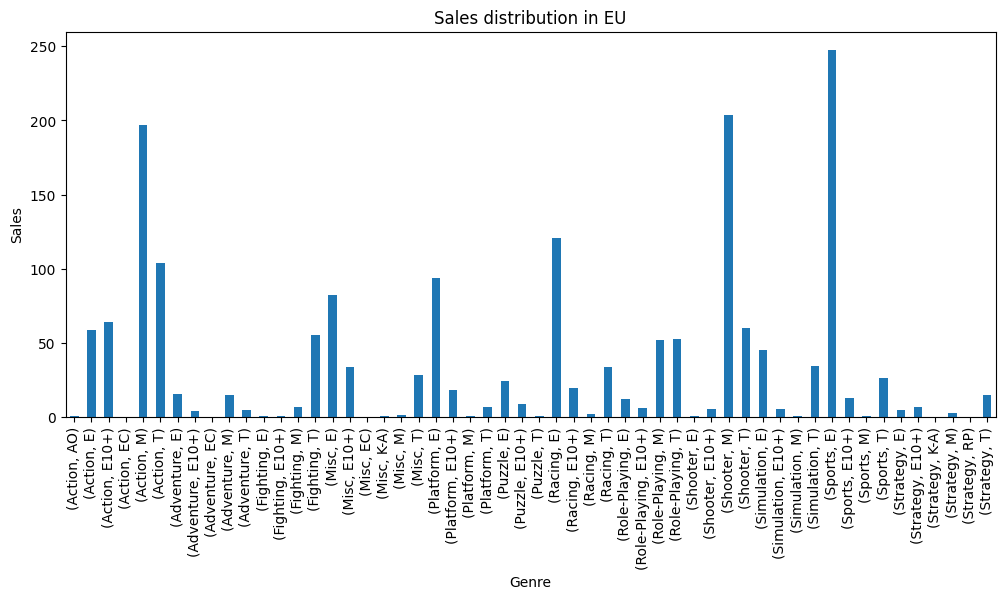

In [33]:
#Preferencia de los géneros de juegos en EU en cuanto a ventas

pref_genre.eu_sales.plot(kind='bar', xlabel='Genre', ylabel='Sales', title='Sales distribution in EU', figsize=(12,5))

Podemos visualizar que las preferencias de los géneros de juegos en las diferentes regios es muy similar, teniendo como principales las clasificaciones E, E10+, M, T, en la mayoría de las regiones, se puede decir que estos géneros son los que lideran los videojuegos entre los preferidos de los usuarios.

In [34]:
df_hipotesis= df_games[df_games['user_score']>0]
df_hipotesis

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,group_platform,rating_definition,total_sales
0,WII SPORTS,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,Nintendo,Everyone,82.54
2,MARIO KART WII,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,Nintendo,Everyone,35.52
3,WII SPORTS RESORT,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,Nintendo,Everyone,32.77
6,NEW SUPER MARIO BROS,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,Nintendo,Everyone,29.80
7,WII PLAY,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,Nintendo,Everyone,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16410,WORMS 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,81.0,K-A,PC,Everyone,0.01
16421,METAL GEAR SOLID V GROUND ZEROES,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.0,76.0,M,PC,Mature,0.01
16425,BREACH,PC,2011.0,Shooter,0.01,0.00,0.00,0.00,61.0,58.0,T,PC,Teens,0.01
16431,STORM FRONTLINE NATION,PC,2011.0,Strategy,0.00,0.01,0.00,0.00,60.0,72.0,E10+,PC,Everyone 10y+,0.01


In [35]:
# Prueba de hipótesis para comprobar las si son las mismas las calificaciones promedio de los usuarios para las plataformas 
#Xbox One y PC

prom_score_xb= df_hipotesis.query('platform == "XOne"')['user_score']
prom_score_pc= df_hipotesis.query('platform == "PC"')['user_score']

alpha=0.05

user_score_prom = st.ttest_ind(prom_score_xb,prom_score_pc, equal_var=False)
print('Valor p:', user_score_prom.pvalue)
if user_score_prom.pvalue < alpha:
    print('No se rechaza la hipótesis nula sobre la igualdad de las calificaciones promedio de los usuarios')
else:
    print('Se rechaza la hipótesis nula sobre la igualdad de las calificaciones promedio de los usuarios')

Valor p: 3.4429374927756545e-06
No se rechaza la hipótesis nula sobre la igualdad de las calificaciones promedio de los usuarios


In [36]:
# Prueba de hipótesis para comprobar las si son diferentes las calificaciones promedio de los usuarios para los géneros 
#de Acción y Deportes

prom_score_action= df_hipotesis.query('genre == "Action"')['user_score']
prom_score_sports=df_hipotesis.query('genre == "Sports"')['user_score']

alpha=0.05

genre_score_prom = st.ttest_ind(prom_score_action,prom_score_sports, equal_var=False).pvalue
print(f'Valor p: {genre_score_prom}')
if genre_score_prom < alpha:
    print('No se rechaza la hipótesis nula sobre la calificación promedio entre los géneros Acción y Deportes son diferentes')
else:
    print('Se rechaza la hipótesis nula sobre la calificación promedio entre los géneros Acción y Deportes son diferentes')

Valor p: 0.0762660759192193
Se rechaza la hipótesis nula sobre la calificación promedio entre los géneros Acción y Deportes son diferentes


## Conclusión

Mediante el análisis se tuvo conocimiento sobre las ventas de video juegos como tuvieron crecimiento realmente significativo a partir de 1995, cuando realmente se dio el boom de los video juegos que fue cuando empezaron a salir aproximadamente los diferentes tipos de consolas y se podia percibir en aquel entonces que era una tecnología nueva para la sociedad juvenil, sobre todo. También se pudo observar cuales plataformas son las que han liderado el mercado estando entre las principales nintendo, xbos y playstation, que hasta el día de hoy se han estado renovando constantemente para no perder el gusto de la población por ellos. De igual manera nos dimos cuenta como influyen las críticas para ya sea incrementar o decaer el nivel de ventas de los video juegos y que la población decida adquirir algún tipo de juego. Finalmente mediante las preferencias de los videojuegos en las distintas regiones, nos pudimos dar cuenta que son muy similares, y esto es de mucho apoyo para saber a que y como enfocar las estrategias de marketing, también dependiendo del objetivo que tenga la empresa.